# Part 2: Genres and communities and plotting

### The questions below are based on Lecture 7, part 2.

1. Write about genres and modularity.
2. Detect the communities, discuss the value of modularity in comparison to the genres.
3. Calculate the matrix  and discuss your findings.
4. Plot the communities and comment on your results.

------

In [108]:
# Importing necessary libraries
import os
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import pickle as pkl
from networkx.algorithms.community.quality import modularity
from matplotlib.pylab import partition
from collections import Counter
import seaborn as sns
from sklearn.metrics import normalized_mutual_info_score, adjusted_mutual_info_score


  Using cached scikit_learn-1.7.2-cp313-cp313-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp313-cp313-macosx_12_0_arm64.whl (8.6 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [scikit-learn] [scikit-learn]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Extracting the genres from each artist's infobox
As suggested in the lecture notes, an LLM was used to generate the code for this task. The output file was inspected and validated before proceeding.

The code used is in the hidden cell bellow for reference.

In [71]:
## GENRE EXTRACTION CODE (HIDDEN) ## 
# def normalize_genre(genre):
#     """Normalize genre names to handle variations."""
#     genre = genre.lower().strip()
    
#     # Mapping for common variations
#     genre_mappings = {
#         "rock'n'roll": "rock and roll",
#         "rock & roll": "rock and roll",
#         "rock 'n' roll": "rock and roll",
#         "rock n roll": "rock and roll",
#         "r&b": "rhythm and blues",
#         "r & b": "rhythm and blues",
#         "hip-hop": "hip hop",
#         "drum'n'bass": "drum and bass",
#         "drum & bass": "drum and bass",
#     }
    
#     return genre_mappings.get(genre, genre)

# def get_wikipedia_url(artist_name):
#     """Convert artist name to Wikipedia URL."""
#     # Replace spaces with underscores and handle special characters
#     url_name = artist_name.replace(" ", "_")
#     return f"https://en.wikipedia.org/wiki/{url_name}"

# def extract_genres_from_infobox(artist_name):
#     """
#     Extract genres from Wikipedia infobox for a given artist.
#     Returns a list of genres, or None if no genres found.
#     """
#     url = get_wikipedia_url(artist_name)
    
#     try:
#         # Add headers to avoid being blocked
#         headers = {
#             'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
#         }
#         response = requests.get(url, headers=headers, timeout=10)
#         response.raise_for_status()
        
#         soup = BeautifulSoup(response.content, 'html.parser')
        
#         # Find the infobox
#         infobox = soup.find('table', class_='infobox')
#         if not infobox:
#             return None
        
#         # Look for genre row in the infobox
#         genres = []
#         rows = infobox.find_all('tr')
        
#         for row in rows:
#             # Check if this row contains genre information
#             header = row.find('th')
#             if header and 'genre' in header.get_text().lower():
#                 # Get the data cell
#                 data = row.find('td')
#                 if data:
#                     # Extract all text, handling links and nested elements
#                     # Remove reference numbers [1], [2], etc.
#                     text = data.get_text(separator='|')
#                     text = re.sub(r'\[\d+\]', '', text)
                    
#                     # Split by common delimiters
#                     genre_list = re.split(r'[,|•\n]', text)
                    
#                     for genre in genre_list:
#                         genre = genre.strip()
#                         if genre and len(genre) > 1:  # Avoid empty or single-char strings
#                             normalized = normalize_genre(genre)
#                             if normalized not in genres:
#                                 genres.append(normalized)
        
#         return genres if genres else None
        
#     except Exception as e:
#         print(f"Error processing {artist_name}: {str(e)}")
#         return None

# def test_extraction():
#     """Test the extraction on known edge cases."""
#     test_cases = [
#         "The Rolling Stones",
#         "The Beatles",
#         "The Animals",
#         "Led Zeppelin",
#         "Queen (band)",
#         "Nirvana (band)"
#     ]
    
#     print("Testing extraction on edge cases:")
#     print("=" * 60)
#     for artist in test_cases:
#         genres = extract_genres_from_infobox(artist)
#         print(f"{artist}: {genres}")
#         time.sleep(1)  # Be polite to Wikipedia servers
#     print("=" * 60)

# def extract_all_genres(graph, sleep_time=1.0, max_nodes=None):
#     """
#     Extract genres for all nodes in the graph.
    
#     Args:
#         graph: NetworkX graph
#         sleep_time: Time to wait between requests (be polite!)
#         max_nodes: Limit processing to first N nodes (for testing)
    
#     Returns:
#         Dictionary mapping artist names to lists of genres
#     """
#     artist_genres = {}
#     nodes = list(graph.nodes())
    
#     if max_nodes:
#         nodes = nodes[:max_nodes]
    
#     total = len(nodes)
    
#     for i, artist in enumerate(nodes, 1):
#         print(f"Processing {i}/{total}: {artist}", end='')
        
#         genres = extract_genres_from_infobox(artist)
        
#         if genres:
#             artist_genres[artist] = genres
#             print(f" ✓ Found {len(genres)} genre(s)")
#         else:
#             print(" ✗ No genres found")
        
#         # Be polite to Wikipedia servers
#         if i < total:
#             time.sleep(sleep_time)
    
#     return artist_genres

# def analyze_genres(artist_genres):
#     """Analyze and report statistics about the genres."""
#     # Number of artists with genres
#     num_artists = len(artist_genres)
#     print(f"\n{'='*60}")
#     print(f"GENRE STATISTICS")
#     print(f"{'='*60}")
#     print(f"Number of nodes with genres: {num_artists}")
    
#     # Average number of genres per artist
#     total_genres = sum(len(genres) for genres in artist_genres.values())
#     avg_genres = total_genres / num_artists if num_artists > 0 else 0
#     print(f"Average number of genres per node: {avg_genres:.2f}")
    
#     # Count all genres
#     genre_counter = Counter()
#     for genres in artist_genres.values():
#         genre_counter.update(genres)
    
#     num_distinct = len(genre_counter)
#     print(f"Total number of distinct genres: {num_distinct}")
    
#     # Top 15 genres
#     print(f"\nTop 15 genres:")
#     print(f"{'-'*60}")
#     top_15 = genre_counter.most_common(15)
#     for genre, count in top_15:
#         print(f"  {genre:30s}: {count:4d} artists")
    
#     return genre_counter, top_15

# def plot_top_genres(top_15):
#     """Create a histogram of the top 15 genres."""
#     genres = [g[0] for g in top_15]
#     counts = [g[1] for g in top_15]
    
#     plt.figure(figsize=(12, 6))
#     plt.barh(range(len(genres)), counts, color='steelblue')
#     plt.yticks(range(len(genres)), genres)
#     plt.xlabel('Number of Artists', fontsize=12)
#     plt.ylabel('Genre', fontsize=12)
#     plt.title('Top 15 Genres by Artist Count', fontsize=14, fontweight='bold')
#     plt.gca().invert_yaxis()  # Highest at top
#     plt.grid(axis='x', alpha=0.3)
#     plt.tight_layout()
#     plt.show()

# # ============================================================================
# # MAIN EXECUTION
# # ============================================================================

# # Load the graph
# print("Loading graph...")
# G_dir = nx.read_graphml("rock_artists.graphml")
# G=G_dir.to_undirected(reciprocal=False, as_view=False)
# print(f"Loaded graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges\n")

# # First, run tests on known artists
# test_extraction()

# # Ask user if they want to proceed
# print("\nTest complete. Ready to process all nodes.")
# print("Note: This will take some time depending on the number of nodes.")
# print("We'll wait 1 second between requests to be polite to Wikipedia.\n")

# # Extract genres for all artists
# # For testing, you can set max_nodes to a small number like 10
# artist_genres = extract_all_genres(G, sleep_time=1.0, max_nodes=None)

# # Analyze and report statistics
# genre_counter, top_15 = analyze_genres(artist_genres)

# # Plot the results
# plot_top_genres(top_15)

# # Save results for later use
# print(f"\nResults saved to 'artist_genres' dictionary")
# print(f"Example: artist_genres['{list(artist_genres.keys())[0]}'] = {artist_genres[list(artist_genres.keys())[0]]}")

The file is stored in a pickle format and later loaded to be used in the downstream analysis.

In [11]:
# Open dict with artist names and genres
with open("artist_genres.pkl", "rb") as file:
    artist_genres = pkl.load(file)
print(artist_genres)

{'disturbed (band)': ['heavy metal', 'alternative metal', 'hard rock', 'nu metal', '(early)'], 'breaking benjamin': ['hard rock', 'post-grunge', 'alternative metal', 'alternative rock'], 'mudvayne': ['alternative metal', 'nu metal', 'progressive metal', 'hard rock'], 'korn': ['nu metal', 'alternative metal'], 'deftones': ['alternative metal', 'art rock', 'shoegaze', 'nu metal', '(early)'], 'stone temple pilots': ['alternative rock', 'grunge', 'hard rock', 'alternative metal', 'psychedelic rock'], 'thousand foot krutch': ['christian rock', 'christian metal', 'heavy metal', 'hard rock', 'alternative rock', 'nu metal', 'rap metal'], 'linkin park': ['alternative rock', 'nu metal', 'rap rock', 'alternative metal', 'electronic rock', 'pop rock'], 'shinedown': ['hard rock', 'alternative metal', 'post-grunge', 'alternative rock', 'pop rock'], '10cc': ['art rock', 'art pop', 'progressive pop', 'soft rock', 'pop rock'], 'the hollies': ['rock', 'pop'], 'the beatles': ['rock', 'pop', 'beat', 'psyc

To start the community analysis we load the network graph stored locally.

In [28]:
# Load the graph
print("Loading graph... \n")
G = nx.read_graphml("new_rock_artists.graphml")
print(f"Loaded graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges\n")

# Use only the undirected version of the graph
G = G.to_undirected()
print(f"Converted to undirected graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges\n")

# Get artist names from the artist_genres dictionary
artist_names = list(artist_genres.keys())
print(f"Number of artists with genre information: {len(artist_names)}\n")

# Select only nodes with a genre attribute
G = G.subgraph(artist_names)
print(f"Subgraph with genre attribute has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges\n")

# Visualize the nodes to check
G.nodes(data=True)

Loading graph... 

Loaded graph with 485 nodes and 8066 edges

Converted to undirected graph with 485 nodes and 6551 edges

Number of artists with genre information: 343

Subgraph with genre attribute has 343 nodes and 4382 edges



NodeDataView({'disturbed (band)': {'length_of_content': 10685}, 'breaking benjamin': {'length_of_content': 15060}, 'mudvayne': {'length_of_content': 7206}, 'korn': {'length_of_content': 26668}, 'deftones': {'length_of_content': 18978}, 'stone temple pilots': {'length_of_content': 9523}, 'thousand foot krutch': {'length_of_content': 6342}, 'linkin park': {'length_of_content': 34784}, 'shinedown': {'length_of_content': 11585}, '10cc': {'length_of_content': 10464}, 'the hollies': {'length_of_content': 6061}, 'the beatles': {'length_of_content': 32613}, 'frank zappa': {'length_of_content': 31101}, 'queen (band)': {'length_of_content': 42039}, 'george harrison': {'length_of_content': 24091}, 'asia (band)': {'length_of_content': 9029}, 'duran duran': {'length_of_content': 18336}, 'peter gabriel': {'length_of_content': 18820}, 'the clash': {'length_of_content': 14276}, 'ramones': {'length_of_content': 17267}, 'paul mccartney': {'length_of_content': 38193}, 'ringo starr': {'length_of_content':

In [29]:
# Adding the genre as an attribute to each node in the graph
# In this case, we are choosing the first genre in case of multiple genres (primary genre)

for artist, genres in artist_genres.items():
    G.nodes[artist]['genre'] = genres[0]
    
print("Added genre attribute to each node in the graph.\n")

# Visualize the nodes to check
G.nodes(data=True)

Added genre attribute to each node in the graph.



NodeDataView({'disturbed (band)': {'length_of_content': 10685, 'genre': 'heavy metal'}, 'breaking benjamin': {'length_of_content': 15060, 'genre': 'hard rock'}, 'mudvayne': {'length_of_content': 7206, 'genre': 'alternative metal'}, 'korn': {'length_of_content': 26668, 'genre': 'nu metal'}, 'deftones': {'length_of_content': 18978, 'genre': 'alternative metal'}, 'stone temple pilots': {'length_of_content': 9523, 'genre': 'alternative rock'}, 'thousand foot krutch': {'length_of_content': 6342, 'genre': 'christian rock'}, 'linkin park': {'length_of_content': 34784, 'genre': 'alternative rock'}, 'shinedown': {'length_of_content': 11585, 'genre': 'hard rock'}, '10cc': {'length_of_content': 10464, 'genre': 'art rock'}, 'the hollies': {'length_of_content': 6061, 'genre': 'rock'}, 'the beatles': {'length_of_content': 32613, 'genre': 'rock'}, 'frank zappa': {'length_of_content': 31101, 'genre': 'rock'}, 'queen (band)': {'length_of_content': 42039, 'genre': 'rock'}, 'george harrison': {'length_of

In [ ]:
# --- Part 2: Community Detection based on Genres ---
# Two different partitions are created based on the genres of the artists:
# 1. A partition where each artist is assigned to their primary genre (the first genre in their list).
# 2. A partition where each artist is randomly assigned to one of their genres.
# 3. A partition using Louvain method for community detection.

# 1. Creating a partition based on the primary genre
primary_genre_partition = {}
for artist, genres in artist_genres.items():
        primary_genre = genres[0]  # Take the first genre as primary
        primary_genre_partition[artist] = primary_genre

# 2. Creating a second partition, where we randomly assign on of the artist genres to each artist
random_genre_partition = {}
for artist, genres in artist_genres.items():
        random_genre = random.choice(genres)  # Randomly select one genre
        random_genre_partition[artist] = random_genre

# Building the communities dictionary based on the primary genre partition
primary_genre_communities = {}
for artist, genre in primary_genre_partition.items():
    if genre not in primary_genre_communities:
        primary_genre_communities[genre] = []
    primary_genre_communities[genre].append(artist)
print(f"Total communities formed based on primary genre: {len(primary_genre_communities)}")

# Building the communities dictionary based on the random genre partition
random_genre_communities = {}
for artist, genre in random_genre_partition.items():
    if genre not in random_genre_communities:
        random_genre_communities[genre] = []
    random_genre_communities[genre].append(artist)
print(f"Total communities formed based on random genre: {len(random_genre_communities)}")

# Building the Louvain partition using NetworkX's built-in function
louvain_communities = nx.community.louvain_communities(G)
print(f"Total communities formed using Louvain method: {len(louvain_communities)}\n")

print("Calculating modularity for each partition...\n")

# Print the beginning of each community (first 5 artists per genre)
for genre, artists in list(primary_genre_communities.items())[:3]:
    print(f"Communities based on primary genre: \n {genre} (n = {len(artists)}): {artists[:5]}")
print("---")
for genre, artists in list(random_genre_communities.items())[:3]:
    print(f"Communities based on random genre: \n {genre} (n = {len(artists)}): {artists[:5]}")
print("---")
for i, community in enumerate(louvain_communities[:3]):
    print(f"Louvain Community {i+1} (n = {len(community)}): {list(community)[:5]}")
print("---")

Total communities formed based on primary genre: 70
Total communities formed based on random genre: 102
Total communities formed using Louvain method: 4

Calculating modularity for each partition...

Communities based on primary genre: 
 heavy metal (n = 11): ['disturbed (band)', 'ozzy osbourne', 'accept (band)', 'judas priest', 'metallica']
Communities based on primary genre: 
 hard rock (n = 31): ['breaking benjamin', 'shinedown', 'alter bridge', 'kiss (band)', 'led zeppelin']
Communities based on primary genre: 
 alternative metal (n = 12): ['mudvayne', 'deftones', 'staind', 'faith no more', 'tool (band)']
---
Communities based on random genre: 
 heavy metal (n = 13): ['disturbed (band)', 'kiss (band)', "guns n' roses", 'ozzy osbourne', 'accept (band)']
Communities based on random genre: 
 post-grunge (n = 9): ['breaking benjamin', 'daughtry (band)', 'hinder', 'stone sour', 'matchbox twenty']
Communities based on random genre: 
 progressive metal (n = 1): ['mudvayne']
---
Louvain Co

# Modularity of a network partition

For a network with total links \(L\), partitioned into communities, the modularity is:

$$
M = \sum_{c=1}^{n_c} \left( \frac{L_c}{L} - \left(\frac{k_c}{2L}\right)^2 \right)
$$

Where:  
- \(L_c\) = number of links inside community \(c\)  
- \(k_c\) = sum of degrees of nodes in community \(c\)  
- \(L\) = total number of links in the network  
- \(n_c\) = number of communities  

**Interpretation:**  
- \(M > 0\) → more internal links than expected by chance (good community)  
- \(M \approx 0\) → like random  
- \(M < 0\) → fewer internal links than expected (bad division)


Modularity (primary genre communities): 0.0872
Modularity (random genre communities): 0.0349
Modularity (Louvain communities): 0.3223



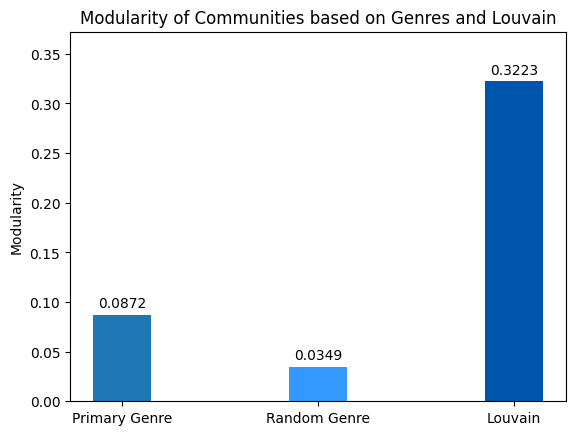

In [93]:
# Calculate modularity for primary genre communities
primary_modularity = modularity(G, primary_genre_communities.values())
print(f"Modularity (primary genre communities): {primary_modularity:.4f}")

# Calculate modularity for random genre communities
random_modularity = modularity(G, random_genre_communities.values())
print(f"Modularity (random genre communities): {random_modularity:.4f}")

# Calculate modularity for Louvain communities
louvain_modularity = modularity(G, louvain_communities)
print(f"Modularity (Louvain communities): {louvain_modularity:.4f}\n")

# Plot the modularity values for comparison, including Louvain community
labels = ['Primary Genre', 'Random Genre', 'Louvain']
modularity_values = [primary_modularity, random_modularity, louvain_modularity]
x = np.arange(len(labels))
width = 0.3
fig, ax = plt.subplots()
bars = ax.bar(x, modularity_values, width, color=['#1f77b4', '#3399ff', '#0055aa'])
ax.set_ylabel('Modularity')
ax.set_title('Modularity of Communities based on Genres and Louvain')
ax.set_xticks(x)
ax.set_xticklabels(labels)
# Adding the value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.ylim(0, max(modularity_values) + 0.05)
plt.show()


**[insert comment on the modularity comparison]**

Visualizing the communities for each partition...



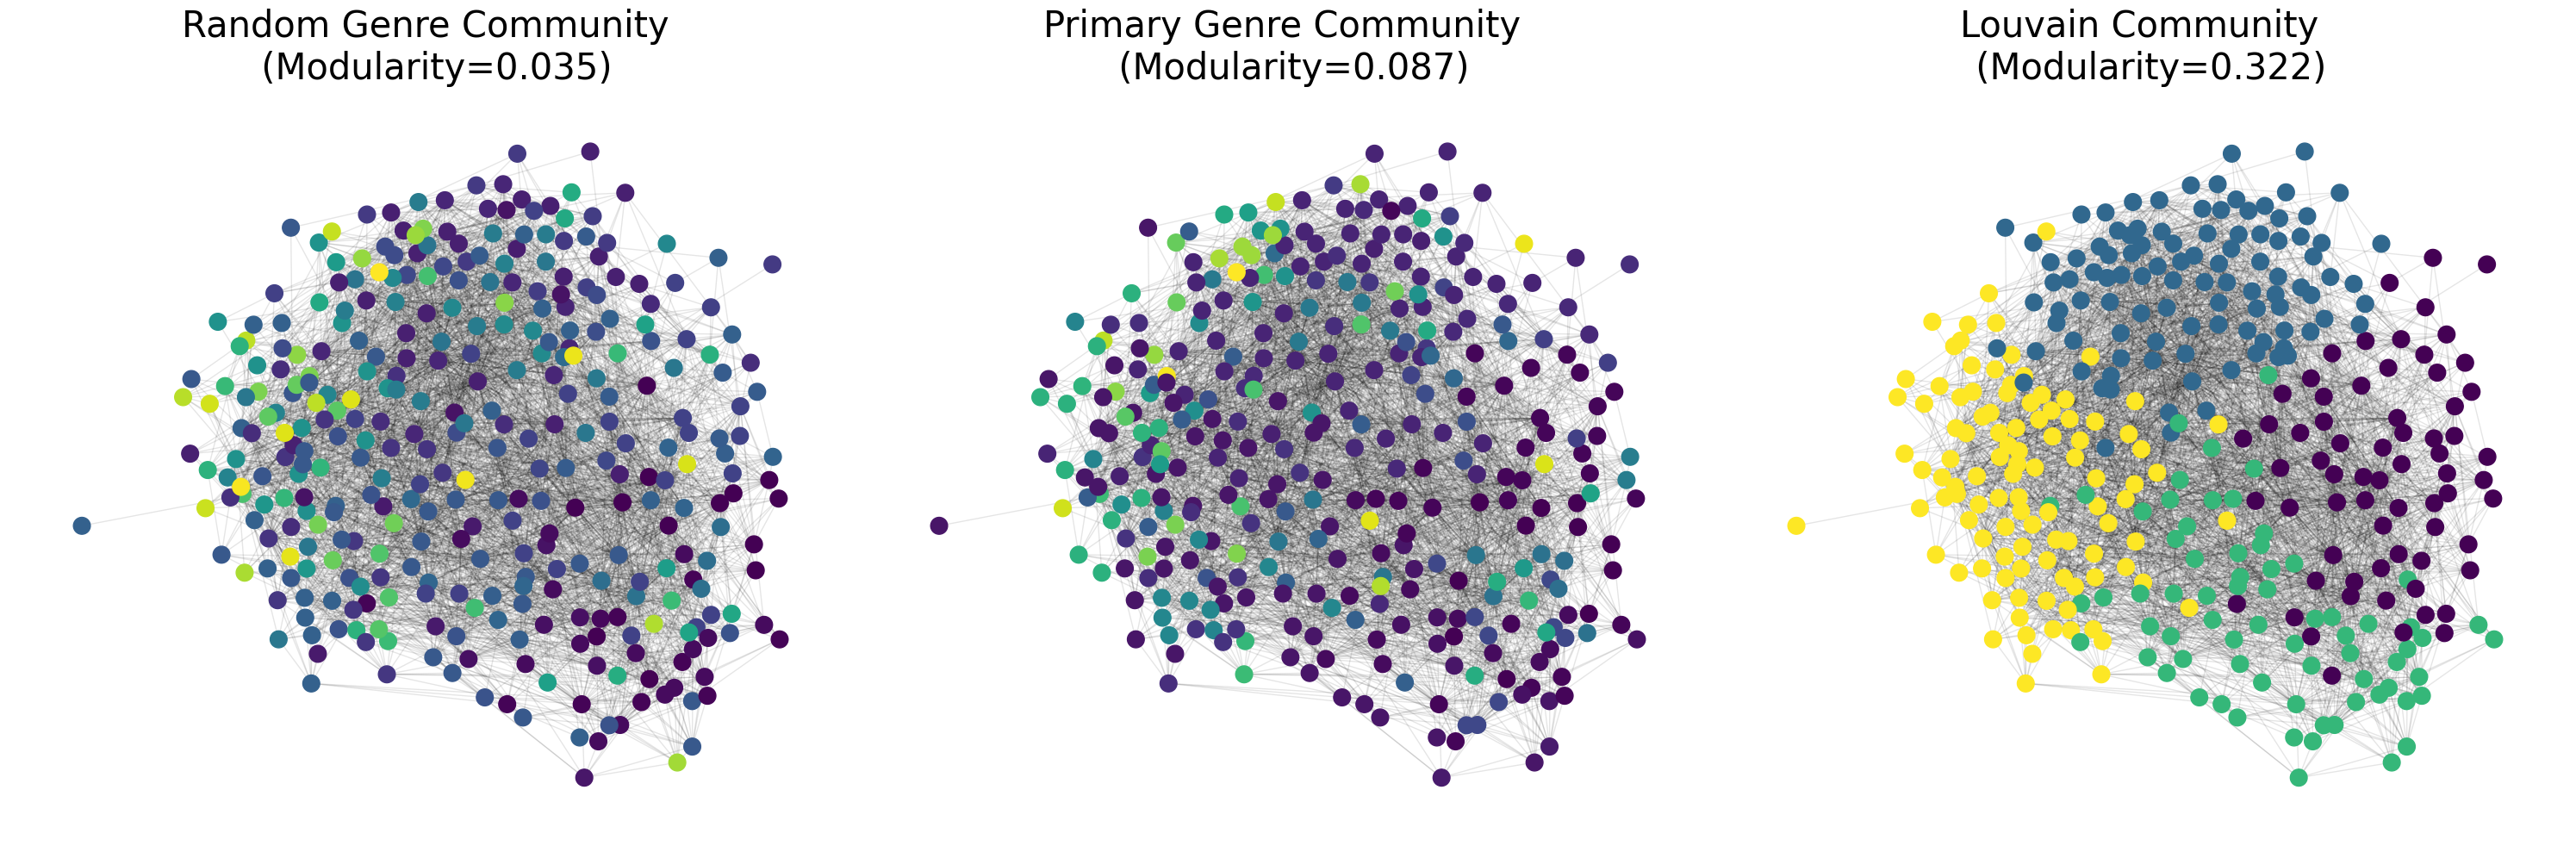

In [97]:
# Visualizing the communities for each partition
print("Visualizing the communities for each partition...\n")

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
pos = nx.forceatlas2_layout(G, max_iter=5000)

# Color maps for different partitions
primary_colors = [list(primary_genre_communities.keys()).index(primary_genre_partition[node]) for node in G.nodes()]
random_colors = [list(random_genre_communities.keys()).index(random_genre_partition[node]) for node in G.nodes()]
louvain_colors = [next(i for i, community in enumerate(louvain_communities) if node in community) for node in G.nodes()]  

# 1. Random genre communities
axes[0].set_title(f"Random Genre Community \n (Modularity={random_modularity:.3f})", fontsize=30)
nx.draw_networkx_nodes(G, pos, node_size=200, node_color=random_colors, cmap=plt.cm.viridis, ax=axes[0])
nx.draw_networkx_edges(G, pos, alpha=0.1, ax=axes[0])
axes[0].axis("off")

# 2. Primary genre communities
axes[1].set_title(f"Primary Genre Community \n (Modularity={primary_modularity:.3f})", fontsize=30)
nx.draw_networkx_nodes(G, pos, node_size=200, node_color=primary_colors, cmap=plt.cm.viridis, ax=axes[1])
nx.draw_networkx_edges(G, pos, alpha=0.1, ax=axes[1])
axes[1].axis("off")

# 3. Louvain communities
axes[2].set_title(f"Louvain Community \n (Modularity={louvain_modularity:.3f})", fontsize=30)
nx.draw_networkx_nodes(G, pos, node_size=200, node_color=louvain_colors, cmap=plt.cm.viridis, ax=axes[2])
nx.draw_networkx_edges(G, pos, alpha=0.1, ax=axes[2])
axes[2].axis("off")

plt.tight_layout()
plt.show()


**[should we do backbone here too?]**

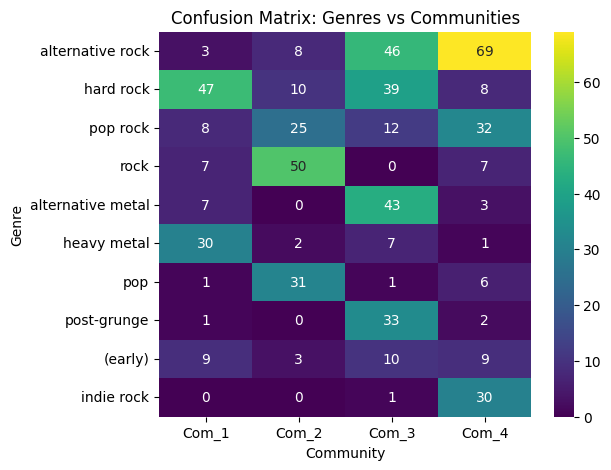

In [ ]:
# Count all genre occurrences (counting all genres for each artist)
genre_counter = Counter()
for genres in artist_genres.values():
    genre_counter.update(genres)

# Select top 10 genres
top_genres = [g for g, _ in genre_counter.most_common(10)]

# Create a dictionary mapping genres to artists
genre_to_artists = {}
for artist, genres in artist_genres.items():
    if not genres:
        
        continue
    for g in genres:
        genre_to_artists.setdefault(g, set()).add(artist)

# Confusion matrix
conf_matrix = np.zeros((len(top_genres), len(louvain_communities)), dtype=int)
for i, g in enumerate(top_genres):
    g_set = genre_to_artists.get(g, set())
    for j, comm in enumerate(louvain_communities):
        conf_matrix[i, j] = len(g_set & set(comm))
        
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=[f'Com_{i+1}' for i in range(len(louvain_communities))],
            yticklabels=top_genres)
plt.title("Confusion Matrix: Genres vs Communities")
plt.xlabel("Community")
plt.ylabel("Genre")
plt.show()


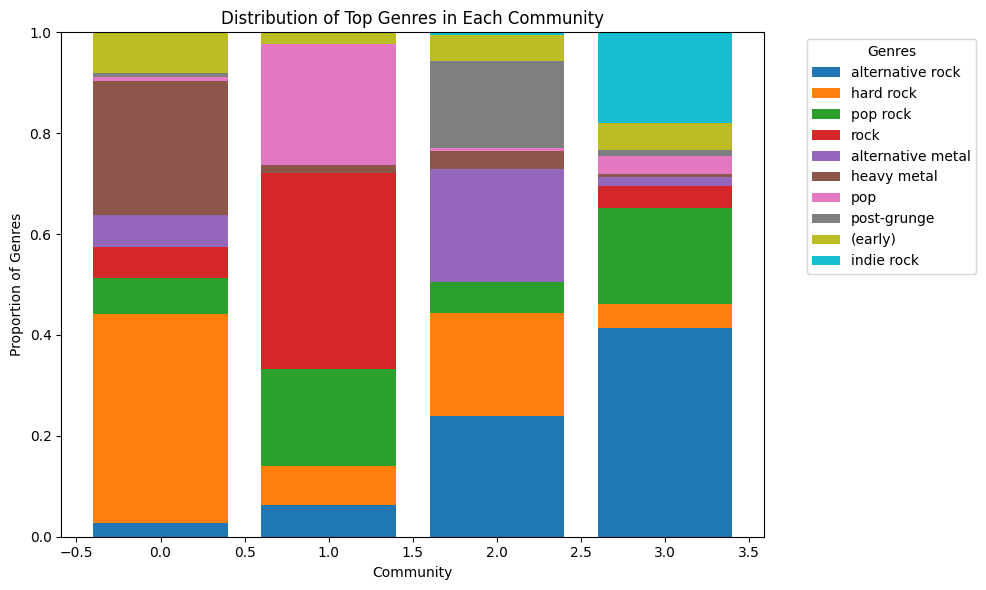

In [135]:
# Plot the distrivbution of genres in. each community in a bar plot
genre_distribution = conf_matrix / conf_matrix.sum(axis=0, keepdims=True)
plt.figure(figsize=(10, 6))
for i, genre in enumerate(top_genres):
    plt.bar(range(len(louvain_communities)), genre_distribution[i, :], bottom=np.sum(genre_distribution[:i, :], axis=0), label=genre)       
plt.xlabel("Community")
plt.ylabel("Proportion of Genres")
plt.title("Distribution of Top Genres in Each Community")
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

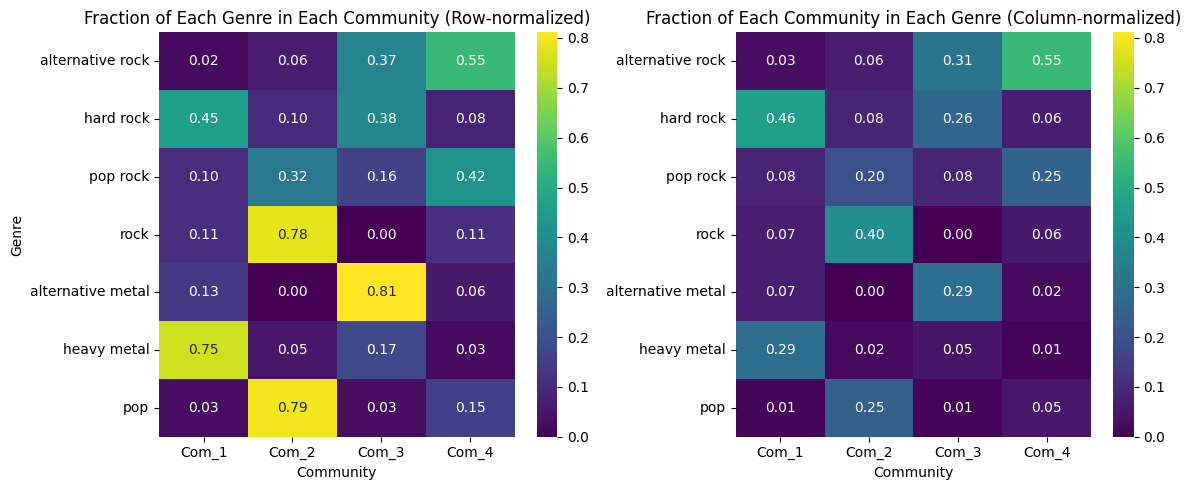

In [124]:
# Row-normalized and column-normalized heatmaps with shared colorbar limits
cont_table = conf_matrix

row_norm = cont_table / cont_table.sum(axis=1, keepdims=True)
col_norm = cont_table / cont_table.sum(axis=0, keepdims=True)

vmax = max(row_norm.max(), col_norm.max())
vmin = min(row_norm.min(), col_norm.min())

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(row_norm, annot=True, fmt='.2f',
            yticklabels=top_genres, xticklabels=[f'Com_{i+1}' for i in range(cont_table.shape[1])],
            cmap='viridis', vmin=vmin, vmax=vmax)
plt.title('Fraction of Each Genre in Each Community (Row-normalized)')
plt.xlabel('Community'); plt.ylabel('Genre')

plt.subplot(1,2,2)
sns.heatmap(col_norm, annot=True, fmt='.2f',
            yticklabels=top_genres, xticklabels=[f'Com_{i+1}' for i in range(cont_table.shape[1])],
            cmap='viridis', vmin=vmin, vmax=vmax)
plt.title('Fraction of Each Community in Each Genre (Column-normalized)')
plt.xlabel('Community'); plt.ylabel('')
plt.tight_layout()
plt.show()
